<a href="https://colab.research.google.com/github/alpellario/Finance-Data-and-Crisis-Analysis/blob/main/%5BTR%5DFinance_Data_Analysis_(2006_2016)_2008_Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
<tr>
<td></td><td></td>
<td>
<img src="https://drive.google.com/uc?id=1Dp8It7cn7Mk4LvYMRib_3CaXFQfXS7ya" width="200" height="200" />
</td>
<td></td>
<td style="padding-left:40px;">

# <strong>SERKAN KAAN KUHEYLAN</strong><br>
## <a href="https://github.com/alpellario?tab=repositories" target=”_blank”>Visit my GitHub repositories</a><br>
## <a href="https://www.linkedin.com/in/serkan-kaan-k%C3%BCheylan-a482b3180/" target=”_blank”>Visit my LinkedIn account</a>
## <a href="https://serkankaankuheylan.com/" target=”_blank”>Visit my Website</a>
</td>
</tr>
</table>


# Finans Veri Analizi (2006-2016): 2008 Krizi

Bu veri projesinde hisse senedi fiyatlarının keşifsel veri analizine odaklanacağım. Banka hisse senetlerine (özellikle kapanış fiyatlarına) odaklanacağım ve bunların [finansal kriz](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) boyunca 2016 başlarına kadar nasıl ilerlediklerini  inceleyeceğim.

## Data

Verileri elde etmek için iki farklı kaynak var: Google Finance ve Yahoo Finance. Verileri notebook üzerinden hızlıca çekmek için `pandas_datareader` kütüphanesini kullanacağım. Google Finance, hata verme eğiliminde olduğu için bu analiz projesinde Yahoo Finance'i kullanacağım. Yahoo Finance'dan 2006-2016 yılları arasında aşağıdaki 6 bankanın verilerini çekeceğim:

*   Bank of America (BAC)
*   Citigroup (C)
*   Goldman Sachs (GS)
*   JPMorgan Chase (JPM)
*   Morgan Stanley(MS)
*   Wells Fargo (WFC)




In [205]:
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import cufflinks as cf

%matplotlib inline
sns.set_style('whitegrid')
cf.go_offline()

In [206]:
yfin.pdr_override()

Çekmek istediğimiz hisse senedi verileri için başlangıç ve bitiş tarihlerini belirlememiz gerekiyor. Daha sonra bu tarihleri `datetime` tipine dönüştüreceğiz.

In [208]:
from datetime import datetime

start = datetime.strptime('2006-01-01', '%Y-%m-%d')
end = datetime.strptime('2016-01-01', '%Y-%m-%d')

print(start, type(start))
print(end, type(end))

2006-01-01 00:00:00 <class 'datetime.datetime'>
2016-01-01 00:00:00 <class 'datetime.datetime'>


Oluşturduğumuz tarihler arasındaki veriyi Yahoo Finance'dan `get_data_yahoo` fonksiyonunu kullanarak çekeceğiz.

In [209]:
BAC = pdr.get_data_yahoo('BAC', start, end)

C = pdr.get_data_yahoo('C', start, end)

GS = pdr.get_data_yahoo('GS', start, end)

JPM = pdr.get_data_yahoo('JPM', start, end)

MS = pdr.get_data_yahoo('MS', start, end)

WFC = pdr.get_data_yahoo('WFC', start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Banka ticker sembollerini içeren bir liste oluşturacağım ve ardından tüm bankaların bilgilerini tek bir `bank_stocks` veri çerçevesinde birleştireceğim.

In [210]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [211]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

İki sütunlu bir MultiIndex veri çerçevesi oluşturdum. İlk seviye banka isimlerini, ikinci seviye ise her banka için Open, High, Close gibi hisse senedi fiyat değerlerini barındırıyor.

In [212]:
bank_stocks.columns

MultiIndex([('BAC',      'Open'),
            ('BAC',      'High'),
            ('BAC',       'Low'),
            ('BAC',     'Close'),
            ('BAC', 'Adj Close'),
            ('BAC',    'Volume'),
            (  'C',      'Open'),
            (  'C',      'High'),
            (  'C',       'Low'),
            (  'C',     'Close'),
            (  'C', 'Adj Close'),
            (  'C',    'Volume'),
            ( 'GS',      'Open'),
            ( 'GS',      'High'),
            ( 'GS',       'Low'),
            ( 'GS',     'Close'),
            ( 'GS', 'Adj Close'),
            ( 'GS',    'Volume'),
            ('JPM',      'Open'),
            ('JPM',      'High'),
            ('JPM',       'Low'),
            ('JPM',     'Close'),
            ('JPM', 'Adj Close'),
            ('JPM',    'Volume'),
            ( 'MS',      'Open'),
            ( 'MS',      'High'),
            ( 'MS',       'Low'),
            ( 'MS',     'Close'),
            ( 'MS', 'Adj Close'),
            ( 

In [213]:
bank_stocks.columns.names

FrozenList([None, None])

MultiIndex seviyelerinin her birine isim verdim ve şimdi `bank_stocks` veri çerçevesinin son haline bir göz atalım.

In [214]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [215]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.168705  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.827047  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.868046  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.820223  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.840729  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.259647  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.282467  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.373726  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.407940  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.761581  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.234495  11016400  
2006-01-04   31.530001  19.011402  10870000  
2006-01-05   31.495001  18.990288  10158000  
2006-01-06   31.680000  19.101841   8403800  
2006-01-09   31.674999  19.098822   5619600  

[5 rows x 36 columns]

2006-2016 yılları arasında 5 banka için maksimum **Close Price** değerini bulacağım.

In [216]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max().round(2)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

Bir varlığın fiyatındaki yüzdesel değişimi hesaplamak için aşağıdaki formülü kullanacağım. Bu formül, özellikle hisse senedi fiyatları, döviz kurları, mal fiyatları ve diğer finansal varlıkların fiyatlarındaki değişimleri ölçmek için kullanılır. T zamanındaki fiyatın, bir önceki zaman dilimine göre yüzdesel değişimini temsil eder ve genellikle yüzde olarak ifade edilir. Finansal piyasalarda günlük, aylık, yıllık gibi çeşitli zaman aralıklarında getiri hesaplamak için kullanılır. Ben günlük değişimi ölçmek için kullanacağım.

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [217]:
returns = pd.DataFrame()

Yukarıdaki formülü uygulamak için Pandas'ın `pct_change()` yöntemini kullanacağım. Bu yöntemi her bankanın **Close Price** değerleri üzerinde çalıştırarak sonuçları `returns` adlı ayrı bir veri çerçevesinde toplayacağım.

In [218]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [219]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Her bir bankanın Close Price değişimleri arasındaki ilişkiyi görselleştirmek için pairplot kullanacağım.

<Figure size 1400x700 with 0 Axes>

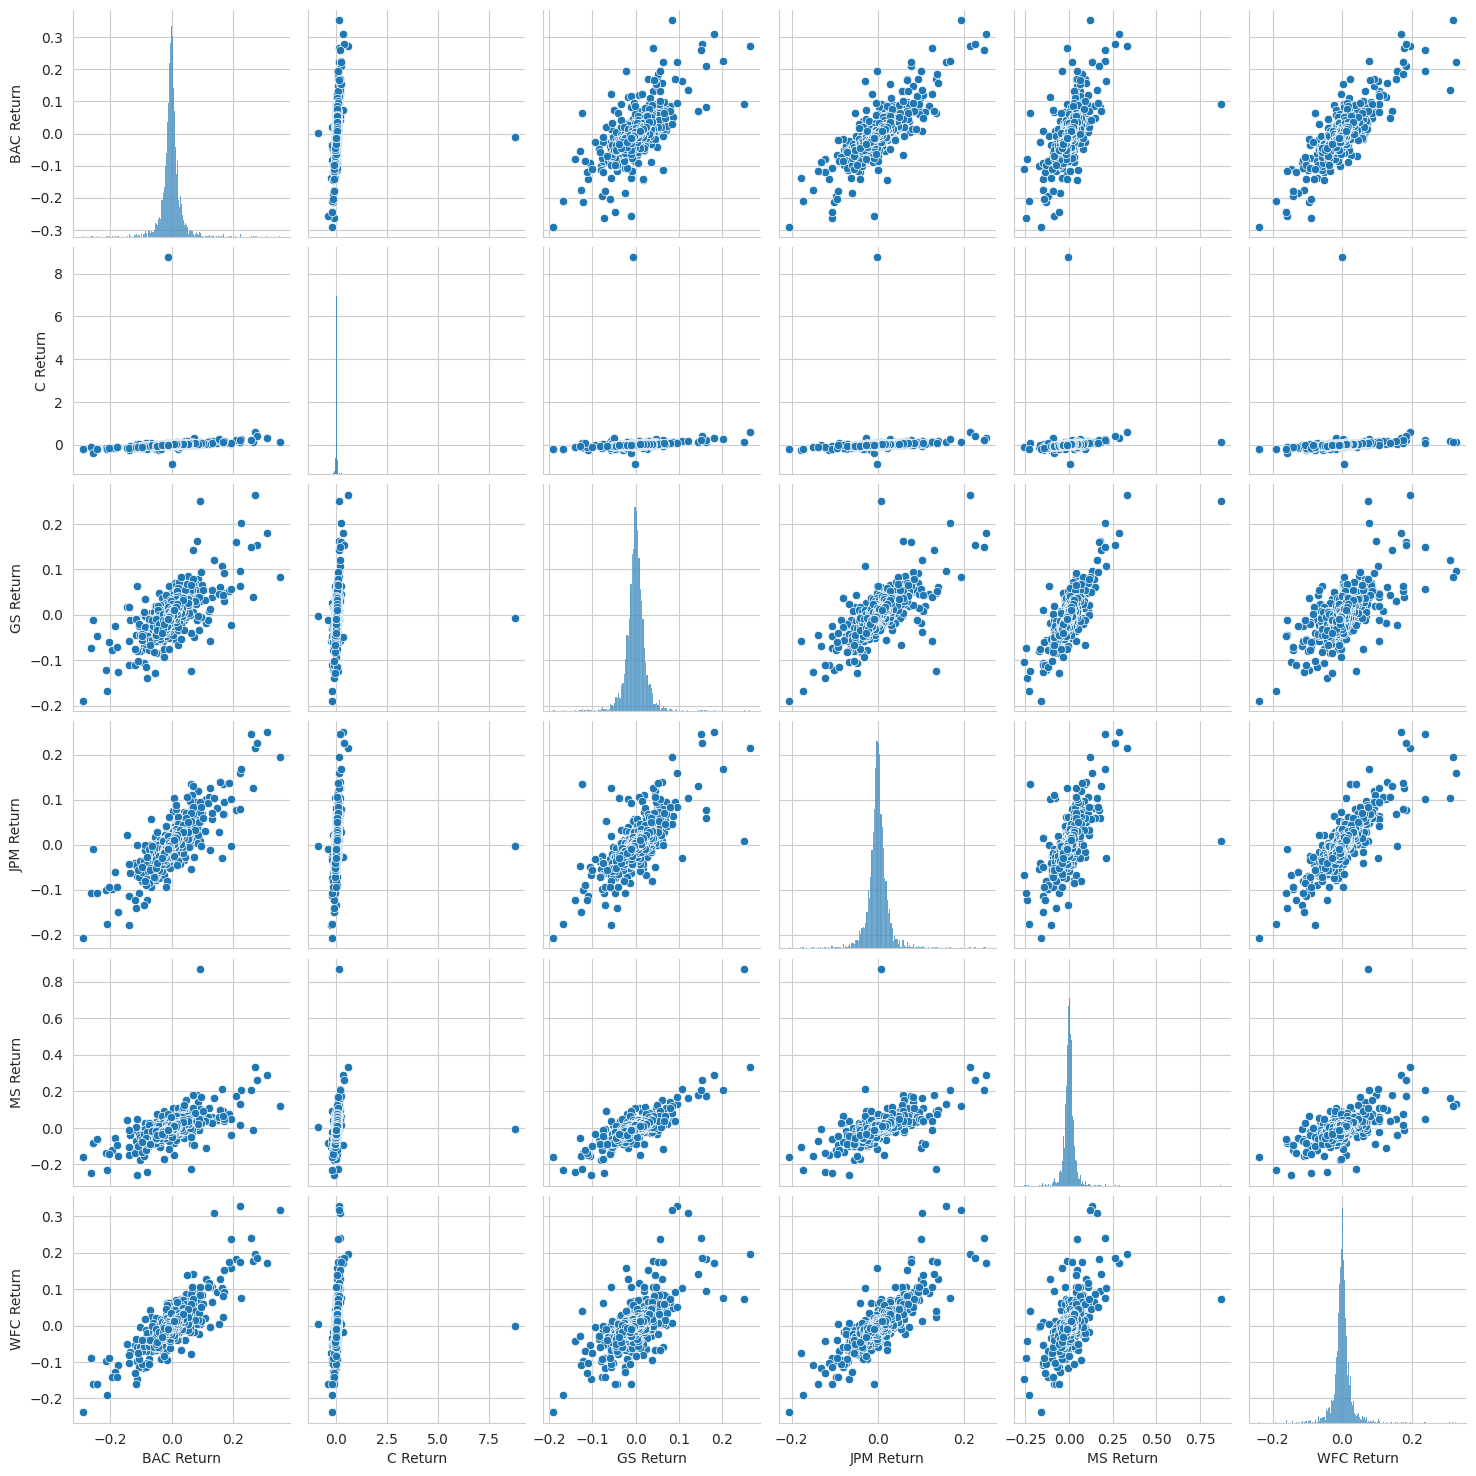

In [222]:
plt.figure(figsize=(14,7))
sns.set_style('whitegrid')

sns.pairplot(returns[1:])

Grafiği incelediğimde ilk dikkat çeken şey Citigroup Bank'ın aşırı yüksek Close Price değişimi. Bunun dışında WFC Bank'ın Close Price değişimleri ile JPM Bank arasında nispeten güçlü bir doğrusal ilişki gözlemleniyor. Benzer şekilde MS Bank'ın da JPM Bank ve GS Bank ile güçlü bir doğrusal ilişkisi olduğu söylenebilir. Diğer bankalar ise kendi aralarında daha zayıf doğrusal ilişkiler gösteriyor.

_____
Her bankanın Close Price değerlerinin en düşük ve en yüksek olduğu tarihleri belirleyeceğim.

In [52]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [54]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Dikkat edilmesi gereken bir nokta, Citigroup (C)'nin en düşük ve en yüksek Close Price değişimini çok kısa bir süre (3 gün) içinde yaşamış olması. Aynı şekilde Morgan Stanley (MS) de 4 gün gibi kısa bir süre içerisinde benzer değişimler yaşamış. Bir diğer önemli nokta ise diğer 4 bankanın minimum değişiminin aynı günde (2009-01-20) olması.

_____
2011 yılındaki Close Price'daki değişimin standart sapmasını hesaplayacağım. Citigroup ile ilgili herhangi bir anormallik bulmayı umuyorum.

In [147]:
returns[returns.index.year == 2011].std()

BAC Return    0.036448
C Return      0.556662
GS Return     0.023911
JPM Return    0.025392
MS Return     0.037460
WFC Return    0.024377
dtype: float64

Görüldüğü üzere Citigroup (C)'nin 2011 yılındaki standart sapması .5 gibi oldukça yüksek ve anormal bir seviyede. Bu durum, yukarıdaki grafikte Citigroup'un gösterdiği aykırı davranışı açıklıyor. Google'da "Citigroup 2011" araması yaptığımda, aşağıdaki haberler dikkatimi çekiyor. 9 Mayıs'ta gerçekleşen 10'a 1 ters hisse senedi bölünmesi, bu değişimi ve anomaliyi tam olarak açıklıyor.

![](https://drive.google.com/uc?export=view&id=1awR2CUMKD-nlDJQQ5MLbailiCYe61PaM)

![](https://drive.google.com/uc?export=view&id=1sBMLTA6pBaFcS8w3wP7BBkbLWUQZoFJy)

___________
Tüm yıllardaki Close Price değerlerinin standart sapmalarını inceleyeceğim ve 2015 yılındaki standart sapma değerlerine göz atacağım.

In [223]:
returns.std()

BAC Return    0.036647
C Return      0.179968
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [224]:
returns[returns.index.year == 2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

Örneğin, buradan yola çıkarak MS Bank'ın varlıklarının diğer bankalara göre göreceli olarak daha riskli olduğunu söyleyebiliriz. Fakat tabii ki bu durumu etkileyebilecek birçok farklı faktör daha var.
_________

2006-2015 yılları arasındaki her bir yıl için "Close Price" değerinde en yüksek standart sapmaya sahip bankayı belirleyeceğim ve bu bilgiyi bir grafikte görselleştireceğim.


In [225]:
annual_highest_deviations = {}

for year in range(2006, 2017):
  year_returns = returns[returns.index.year == year]
  highest_std_bank = year_returns.std().sort_values(ascending=False).index[0]
  highest_std_value = year_returns.std().sort_values(ascending=False).values[0]
  annual_highest_deviations[year] = {"bank": highest_std_bank, "standard_deviation": highest_std_value}

df = pd.DataFrame.from_dict(annual_highest_deviations, orient="index", columns=["bank", "standard_deviation"])
df

,bank,standard_deviation
2006,GS Return,0.014838
2007,MS Return,0.024866
2008,MS Return,0.087604
2009,C Return,0.079363
2010,C Return,0.023955
2011,C Return,0.556662
2012,BAC Return,0.024636
2013,MS Return,0.017797
2014,MS Return,0.013665
2015,MS Return,0.016249


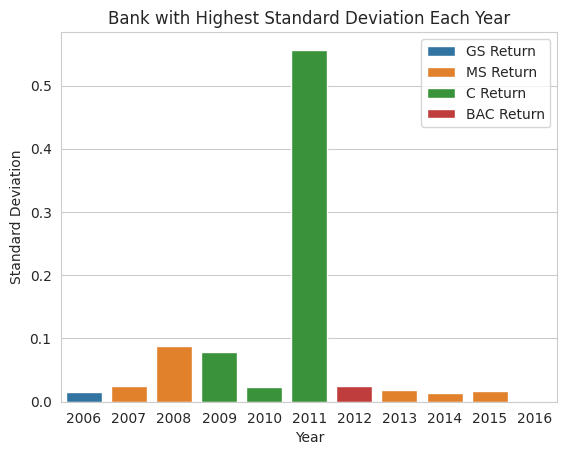

In [226]:
df = pd.DataFrame.from_dict(annual_highest_deviations, orient="index", columns=["bank", "standard_deviation"])

sns.barplot(x=df.index, y="standard_deviation", data=df, hue=df['bank'])
plt.title("Bank with Highest Standard Deviation Each Year")
plt.xlabel("Year")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

Grafikte görüldüğü üzere, en yüksek varlık değeri değişiminin 2011 yılında Citigroup'a ait olduğu görülüyor, daha önce de tespit ettiğimiz gibi. Citigroup bu konumu 2009-2011 yılları arasında korurken, 2007-2008 ve 2013-2015 yılları arasındaki en riskli varlığa sahip banka MS Bank olarak değerlendirilebilir.
___________________________

Her yıl en yüksek varlık değeri değişimine sahip bankanın o yılki Close Price değişimini görselleştirerek ve analiz ederek performansları hakkında fikir edineceğim.

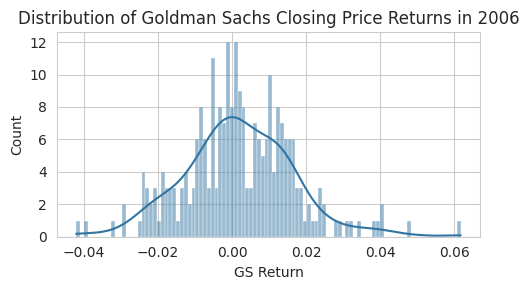

In [227]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2006]['GS Return'], kde=True, bins=100, color='#3274A1')
plt.title('Distribution of Goldman Sachs Closing Price Returns in 2006')
plt.tight_layout()

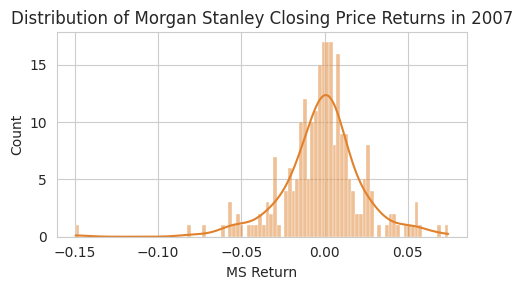

In [228]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2007]['MS Return'], kde=True, bins=100, color='#E1812C')
plt.title('Distribution of Morgan Stanley Closing Price Returns in 2007')
plt.tight_layout()

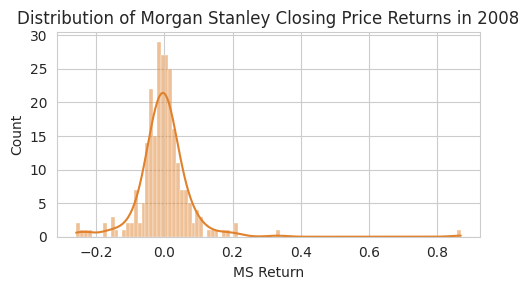

In [229]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2008]['MS Return'], kde=True, bins=100, color='#E1812C')
plt.title('Distribution of Morgan Stanley Closing Price Returns in 2008')
plt.tight_layout()

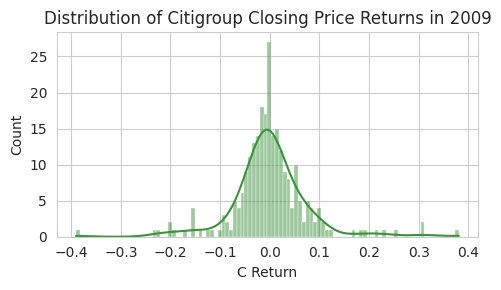

In [230]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2009]['C Return'], kde=True, bins=100, color='#3A923A')
plt.title('Distribution of Citigroup Closing Price Returns in 2009')
plt.tight_layout()

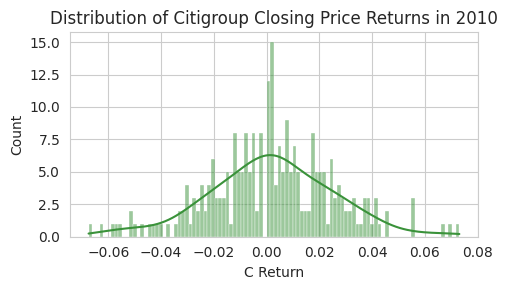

In [231]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2010]['C Return'], kde=True, bins=100, color='#3A923A')
plt.title('Distribution of Citigroup Closing Price Returns in 2010')
plt.tight_layout()

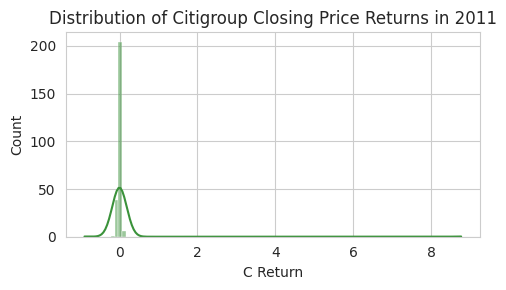

In [233]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2011]['C Return'], kde=True, bins=100, color='#3A923A')
plt.title('Distribution of Citigroup Closing Price Returns in 2011')
plt.tight_layout()

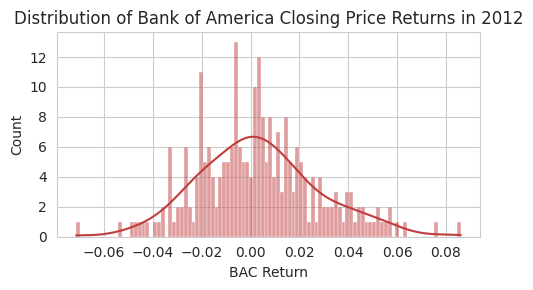

In [240]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2012]['BAC Return'], kde=True, bins=100, color='#C03D3E')
plt.title('Distribution of Bank of America Closing Price Returns in 2012')
plt.tight_layout()

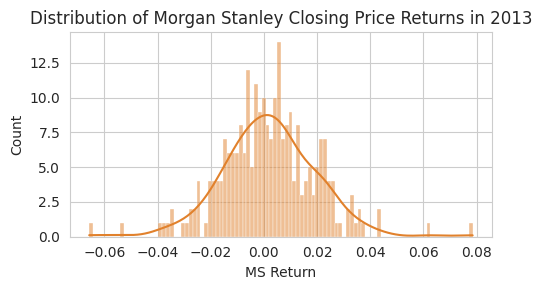

In [241]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2013]['MS Return'], kde=True, bins=100, color='#E1812C')
plt.title('Distribution of Morgan Stanley Closing Price Returns in 2013')
plt.tight_layout()

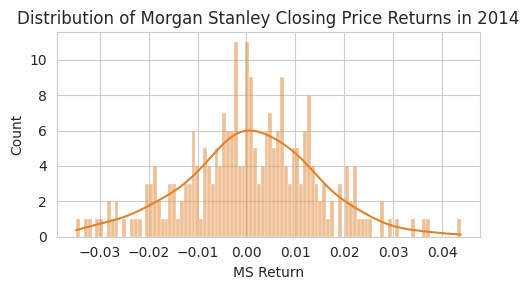

In [243]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2014]['MS Return'], kde=True, bins=100, color='#E1812C')
plt.title('Distribution of Morgan Stanley Closing Price Returns in 2014')
plt.tight_layout()

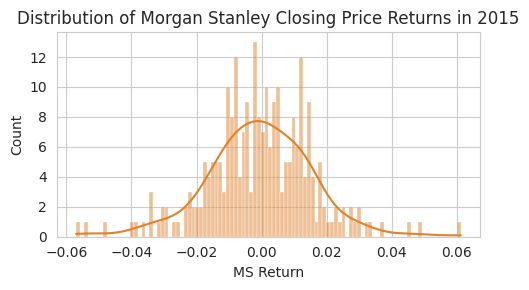

In [244]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2015]['MS Return'], kde=True, bins=100, color='#E1812C')
plt.title('Distribution of Morgan Stanley Closing Price Returns in 2015')
plt.tight_layout()

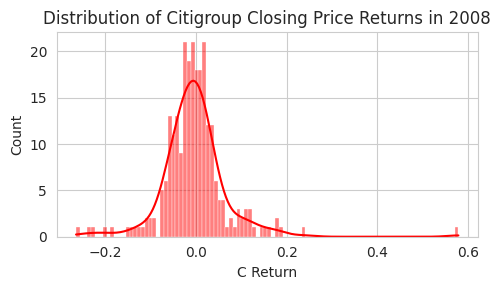

In [245]:
plt.figure(figsize=(5,3))
sns.histplot(data=returns[returns.index.year == 2008]['C Return'], kde=True, bins=100, color='red')
plt.title('Distribution of Citigroup Closing Price Returns in 2008')
plt.tight_layout()

2006-2016 yılları arasındaki 10 yıllık periyotta tüm bankaların Close Price değerlerindeki değişimi gösteren bir çizgi grafiği oluşturarak karşılaştırmalı analiz yapacağım.

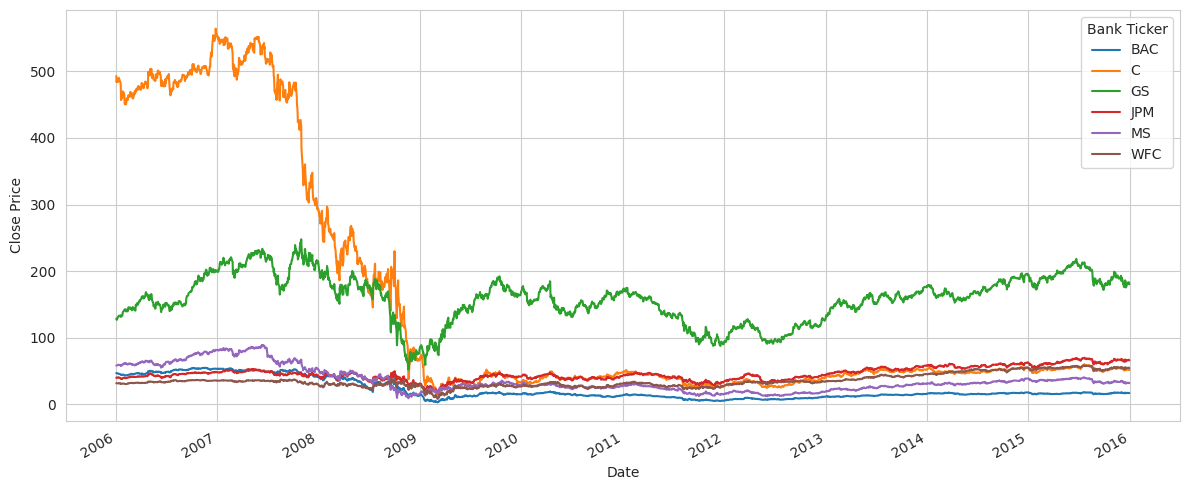

In [187]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot.line(figsize=(12,5))
plt.ylabel('Close Price')
plt.tight_layout()

## Moving Averages

Her bankanın 2008 yılındaki Close Price değerlerinin 30 günlük hareketli ortalama grafiğini oluşturarak kısa vadeli fiyat eğilimlerini görselleştireceğim.



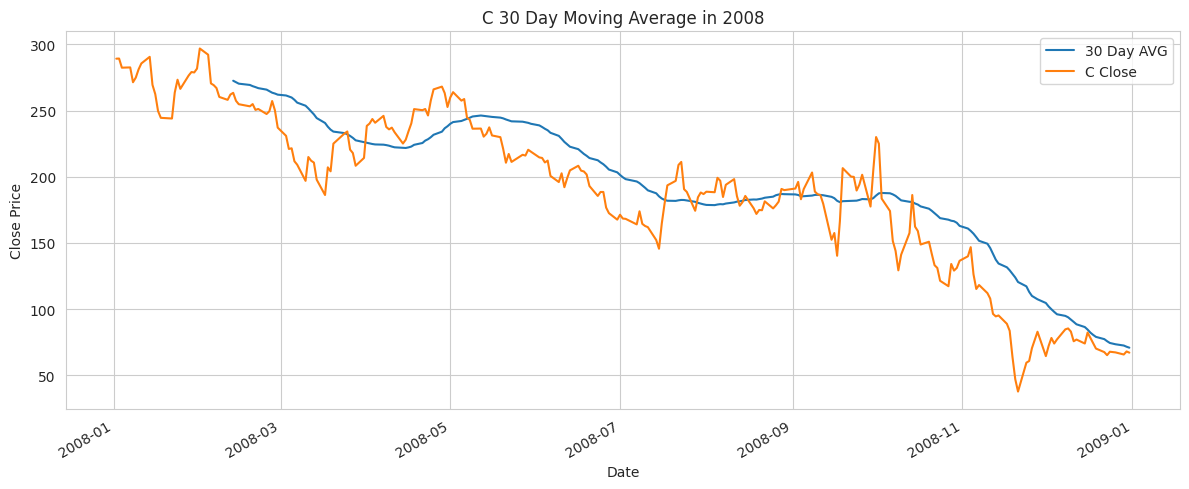

In [188]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['C'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day AVG')
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['C'].loc['2008-01-01':'2009-01-01'].plot(label='C Close', color='#FF7F0E')
plt.title('C 30 Day Moving Average in 2008')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

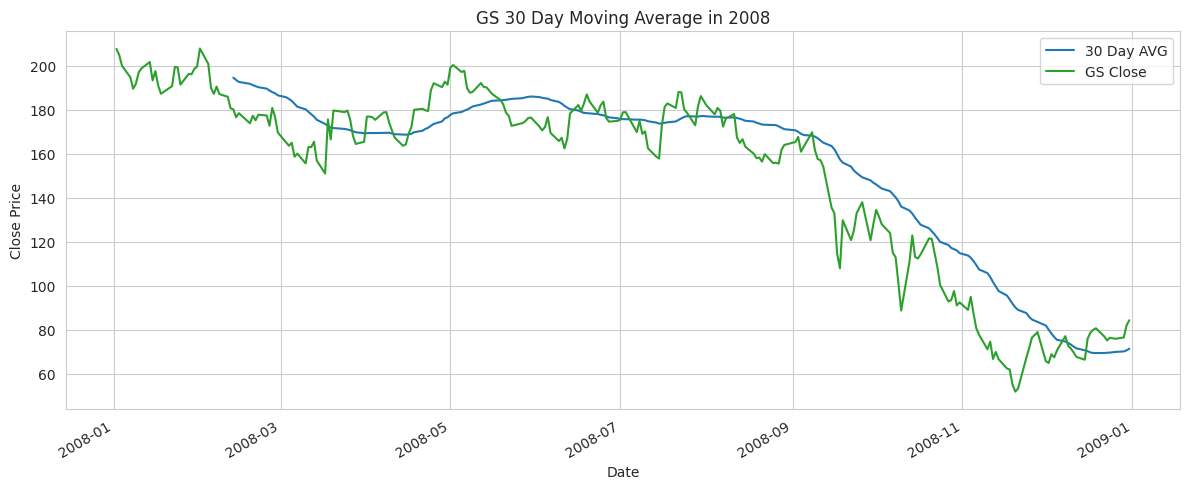

In [189]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['GS'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day AVG')
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['GS'].loc['2008-01-01':'2009-01-01'].plot(label='GS Close', color='#2CA02C')
plt.title('GS 30 Day Moving Average in 2008')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

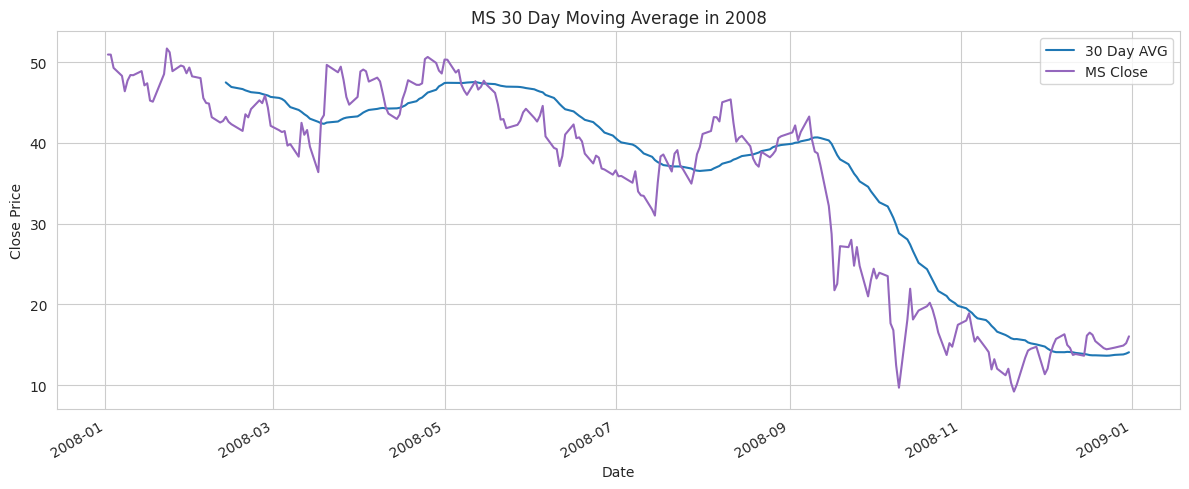

In [194]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['MS'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day AVG')
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['MS'].loc['2008-01-01':'2009-01-01'].plot(label='MS Close', color='#9467BD')
plt.title('MS 30 Day Moving Average in 2008')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

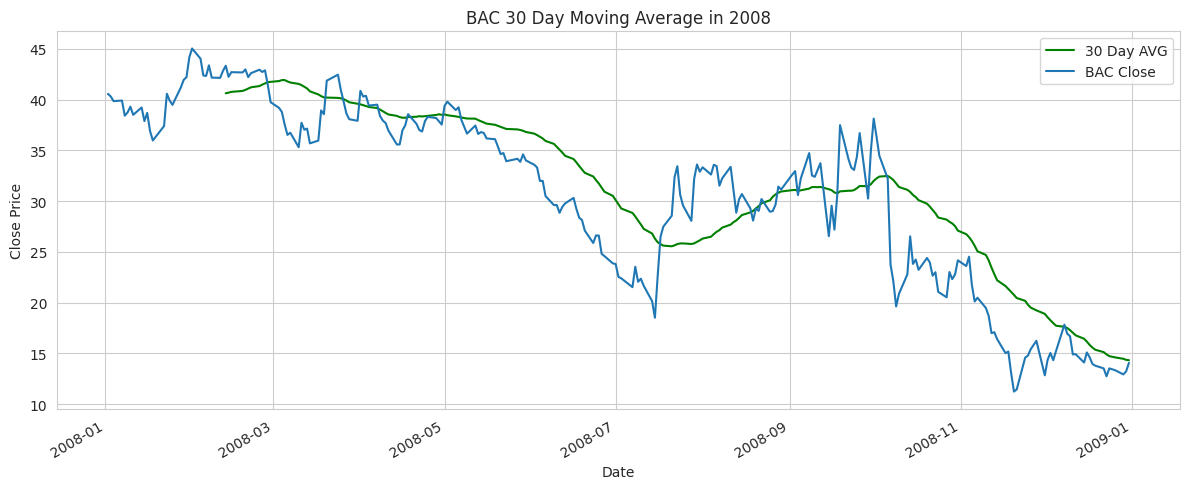

In [193]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['BAC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day AVG', color='green')
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['BAC'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close', color='#1F77B4')
plt.title('BAC 30 Day Moving Average in 2008')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

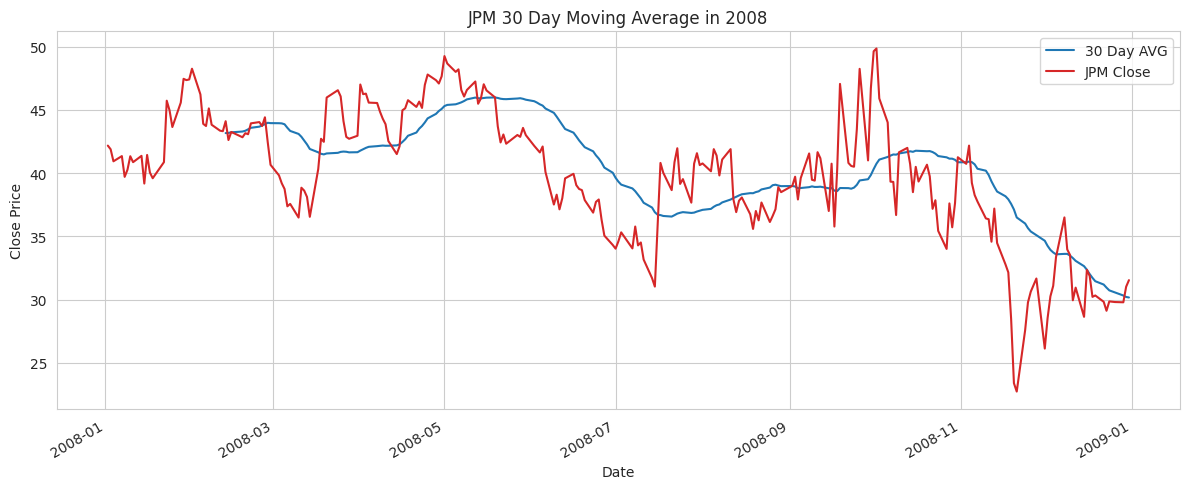

In [196]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['JPM'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day AVG')
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['JPM'].loc['2008-01-01':'2009-01-01'].plot(label='JPM Close', color='#D62728')
plt.title('JPM 30 Day Moving Average in 2008')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

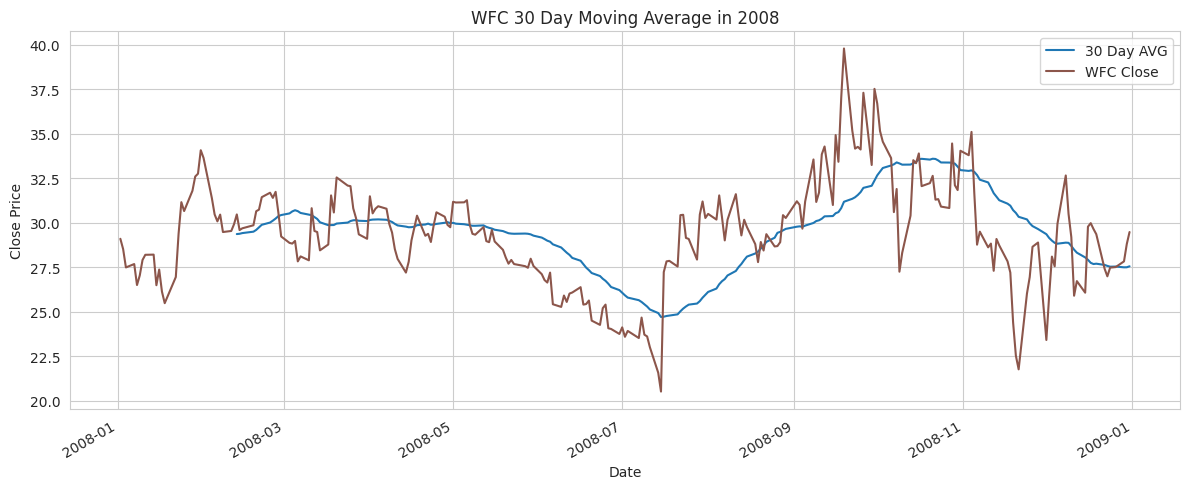

In [197]:
plt.figure(figsize=(12,5))
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['WFC'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day AVG')
bank_stocks.xs(key='Close', axis=1, level='Stock Info')['WFC'].loc['2008-01-01':'2009-01-01'].plot(label='WFC Close', color='#8C564B')
plt.title('WFC 30 Day Moving Average in 2008')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()

Son aşamada, her bankanın Open Price ve Close Price değerlerinin diğer bankalarla olan korelasyonunu hesaplayarak ve görselleştirerek olası ilişkileri belirleyeceğim.

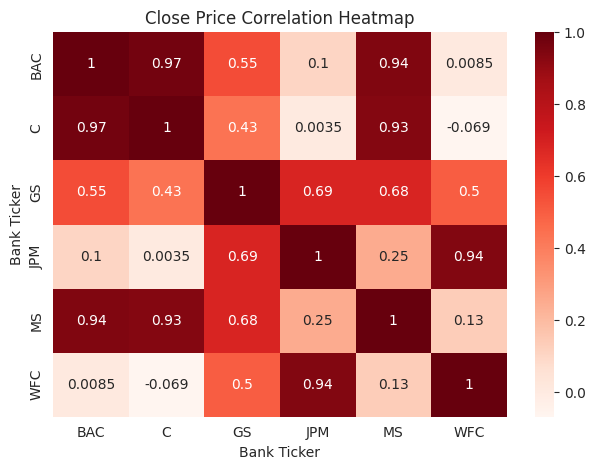

In [198]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='Reds')
plt.title('Close Price Correlation Heatmap')
plt.tight_layout()

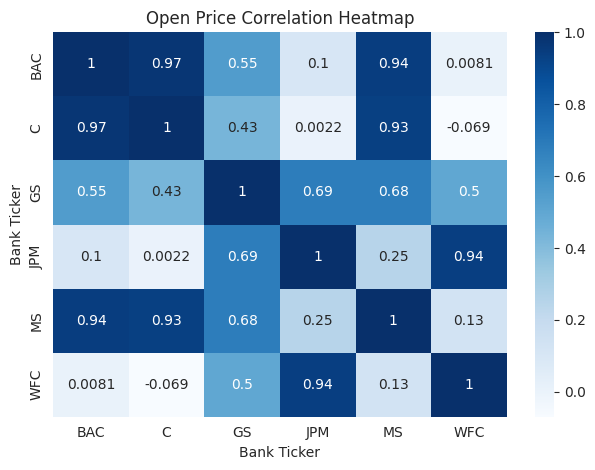

In [200]:
sns.heatmap(bank_stocks.xs(key='Open', axis=1, level='Stock Info').corr(), annot=True, cmap='Blues')
plt.title('Open Price Correlation Heatmap')
plt.tight_layout()

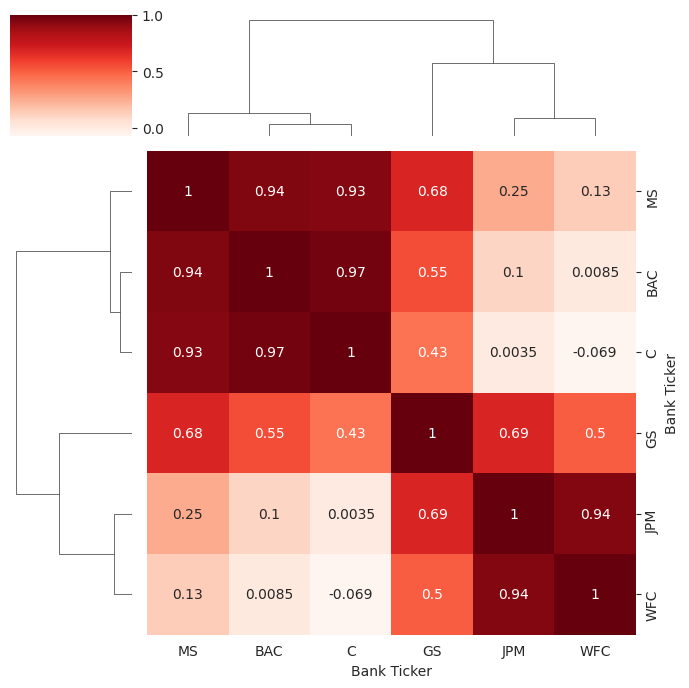

In [201]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='Reds', figsize=(7,7))
plt.tight_layout()

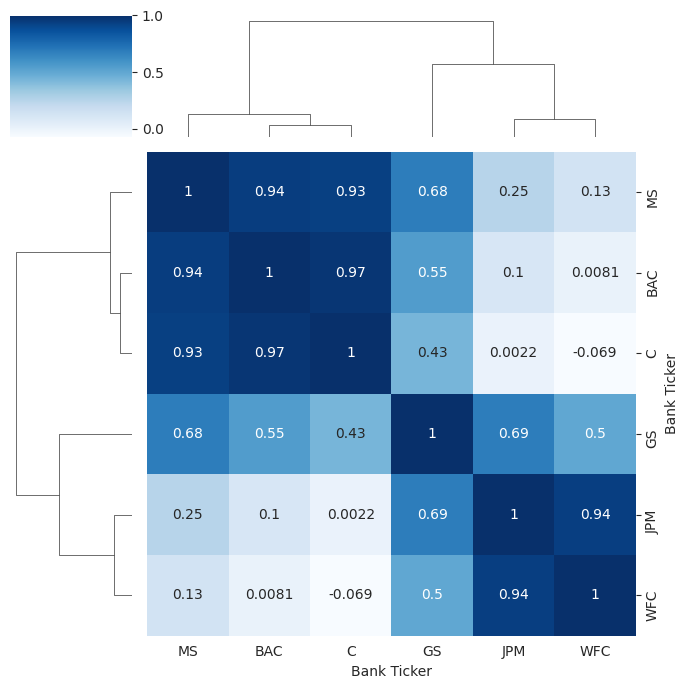

In [203]:
sns.clustermap(bank_stocks.xs(key='Open', axis=1, level='Stock Info').corr(), annot=True, cmap='Blues', figsize=(7,7))
plt.tight_layout()